## Section 1: Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

## Section 2: Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Section 3: Loading Data

In [ ]:
filename = '/content/drive/MyDrive/Data Science/Colab Notebooks/Data/Data Science Fundamentals/sales_predictions.csv'
df = pd.read_csv(filename)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Section 4: Data Understanding

## 4.1 - Primary Look

In [ ]:
# General informaiton our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Display size of dataframe
df.shape

(8523, 12)

In [ ]:
# Display a full statistical summary
df.describe(include = 'all'). round(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.00,8523,8523.00,8523,8523.00,8523,8523.00,6113,8523,8523,8523.00
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.86,NaN,0.07,NaN,140.99,NaN,1997.83,NaN,NaN,NaN,2181.29
std,NaN,4.64,NaN,0.05,NaN,62.28,NaN,8.37,NaN,NaN,NaN,1706.50
min,NaN,4.56,NaN,0.00,NaN,31.29,NaN,1985.00,NaN,NaN,NaN,33.29
25%,NaN,8.77,NaN,0.03,NaN,93.83,NaN,1987.00,NaN,NaN,NaN,834.25
50%,NaN,12.60,NaN,0.05,NaN,143.01,NaN,1999.00,NaN,NaN,NaN,1794.33
75%,NaN,16.85,NaN,0.09,NaN,185.64,NaN,2004.00,NaN,NaN,NaN,3101.30


- Looks like we have missing data on 'Item_Weight' and 'Outlet_Size'.

## 4.2 - Identify duplicate values

In [ ]:
# Duplicate rows in our data.
df.duplicated().sum()

0

In [ ]:
df.duplicated().value_counts()

False    8523
dtype: int64

## 4.3 - Identify missing data. 

In [ ]:
# Missing values in 'Item_Weight' and 'Outlet_Size' columns.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Calculating the impact of missing data.

# Item Weight
miss_weight_data = round((1463 / 8523 * 100),2)

print(f"The missing data from 'Item_Weight' represents", miss_weight_data, "%.")

# Item Size
miss_size_data = round((2410 / 8523 * 100),2)
print(f"The {miss_size_data}% of the data is missing from column Outlet_Size.")

The missing data from 'Item_Weight' represents 17.17 %.
The 28.28% of the data is missing from column Outlet_Size.


- Our job is to predict how the sales will be in 2023, so the weight of the product is not a variable that will influence the sales. For that reason, we decided to drop the rows with this issue.
- Missing data will be handled in Section 5

## 4.4 - Identify inconsistencies in categorial values. 

In [ ]:
# Now, let's have a quick look about any inconsistent category in our dataframe.
dtypes = df.dtypes
obj_columns = dtypes[dtypes == 'object'].index
obj_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in obj_columns:
  print(f'\033[1m - Column - \033[0;0m {col}')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

 - Column -  Item_Identifier
FDF22    8
FDG33    8
DRE49    8
NCY18    8
DRN47    8
        ..
NCS41    1
FDP15    1
NCU29    1
FDH52    1
NCT53    1
Name: Item_Identifier, Length: 1555, dtype: int64



 - Column -  Item_Fat_Content
Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64



 - Column -  Item_Type
Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64



 - Column -  Outlet_Identifier
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
Name: Outlet_Ide

Notes:

- Column 'Item_Fat_Content' has 3 categories for low fat (Low Fat, LF, anf low fat).
- This issue will be addressed in Section 5

## 4.5 - Identify outliers

In [ ]:
# Let's generate statistical summary.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Notes:

- It doesn't look that there is not outliers in our data. Let's confirm that with boxplots.
- Because each variable has a different scale, it's recommended to graph each one separate.

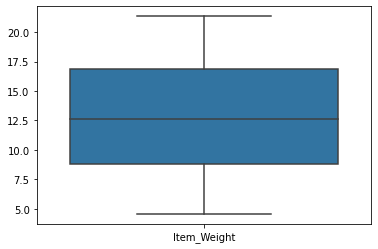

In [ ]:
# Boxplot for 'Item_Weight' using Seaborn.
sns.boxplot(data=df.loc[:, ['Item_Weight']]);

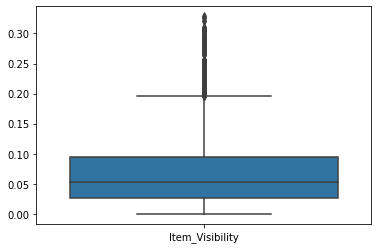

In [ ]:
# Boxplot for 'Item_Visibility' using Seaborn.
sns.boxplot(data=df.loc[:, ['Item_Visibility']]);

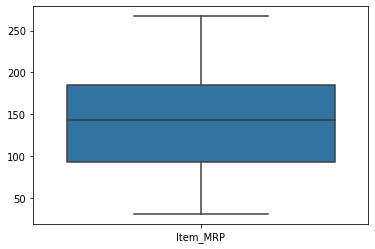

In [ ]:
# Boxplot for 'Item_MRP' using Seaborn.
sns.boxplot(data=df.loc[:, ['Item_MRP']]);

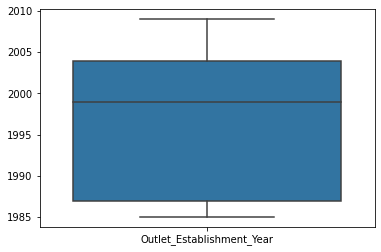

In [ ]:
# Boxplot for 'Outlet_Establishment_Year' using Seaborn.
sns.boxplot(data=df.loc[:, ['Outlet_Establishment_Year']]);

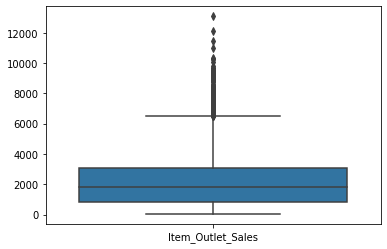

In [ ]:
# Boxplot for'Item_Outlet_Sales' using Seaborn.
sns.boxplot(data=df.loc[:, ['Item_Outlet_Sales']]);

Notes:

As the plots shows, we identified outliers on 'Item_Visibility' and 'Item_Outlet_Sales' variables.
About 'Item_Visibility', a high percentage of visibility is a factor that the Management should determine if it affects the profit. From our perspective, high value does not affect sales in a negative way.
For 'Item_Outlet_Sales', more sales it's better.
Both columns will remain the same in our dataframe.

# Section 5: Data Cleaning

## 5.1 - Address missing data

In [ ]:
# Let's drop the missing data in 'Item_Weight' according to what was reported in notes from section 4.3.

# Let's begin with 'Item_Weight'.
df.dropna(subset = ['Item_Weight'],inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Note:

- About the 'Outlet Size', it's a variable that could influence the sales. In this case we decided to fill missing data with the average size of the stores (Medium).

In [ ]:
# First, let's have a look about the values inside the column 'Outlet_Size'.
df['Outlet_Size'].value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Now let's fill empty values with 'Medium' category.
df['Outlet_Size'].fillna('Medium', inplace=True)
df["Outlet_Size"].value_counts()

Medium    4268
Small     1860
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Checking missing data again.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 5.2 - Address inconsistency data

In [ ]:
# In order to fix the inconsistency reported in section 4.4,
# we are going to leave only two categories: Low Fat, and Regular.
repl_low1 = {'LF':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(repl_low1)

repl_low2 = {'low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(repl_low2)

repl_reg = {'reg':'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(repl_reg)

df['Item_Fat_Content'].value_counts()

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Let's see how looks our clean dataframe.
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Section 6: Data Exploration

In [ ]:
# Now that our dataframe is clean, let's see its descriptive statistic summary.
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,7060,7060.000000,7060,7060.000000,7060,7060.000000,7060,7060.000000,7060,7060,7060,7060.000000
unique,1555,NaN,2,NaN,16,NaN,8,NaN,3,3,3,NaN
top,FDF22,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT013,NaN,Medium,Tier 2,Supermarket Type1,NaN
freq,8,NaN,4566,NaN,1019,NaN,932,NaN,4268,2785,5577,NaN
mean,NaN,12.857645,NaN,0.063963,NaN,141.240683,NaN,2000.490935,NaN,NaN,NaN,2118.626808
std,NaN,4.643456,NaN,0.048625,NaN,62.411888,NaN,6.588984,NaN,NaN,NaN,1533.445842
min,NaN,4.555000,NaN,0.000000,NaN,31.490000,NaN,1987.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026768,NaN,94.143600,NaN,1997.000000,NaN,NaN,NaN,922.798800
50%,NaN,12.600000,NaN,0.052493,NaN,142.729900,NaN,2002.000000,NaN,NaN,NaN,1789.670400
75%,NaN,16.850000,NaN,0.092774,NaN,186.024000,NaN,2007.000000,NaN,NaN,NaN,2966.139000


In context:

We have three variables that we consider that would affect the sales volume (Variables Type A):

- Item_Visibility.

- Item_Type.

- Item_MRP.

We identified three variables that could affect the sales behavior (Variables Type B):

- Outlet_Size.

- Outlet_Location_Type.

- Outlet_Type.

In the current analysis, we are going to work with the variables decrypted above to compare their relationship with Item_Outlet_Sales.

## 6.1.- Exploring data of Variables Type A

In [ ]:
# Checking the categories inside 'Item_Visibility' column.
df['Item_Visibility'].value_counts().sort_values(ascending=False)

0.000000    436
0.076975      3
0.034868      2
0.080766      2
0.107274      2
           ... 
0.042716      1
0.014072      1
0.049548      1
0.146172      1
0.044878      1
Name: Item_Visibility, Length: 6519, dtype: int64

In [ ]:
# Checking the categories inside 'Item_Type' column.
df['Item_Type'].value_counts().sort_values(ascending=False)

Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64

In [ ]:
# Checking the categories inside 'Item_MRP' column.
df['Item_MRP'].value_counts().sort_values(ascending=False)

170.5422    6
196.5768    6
142.0154    6
152.8366    5
37.9532     5
           ..
34.3558     1
152.9340    1
31.4900     1
44.4086     1
75.4670     1
Name: Item_MRP, Length: 5225, dtype: int64

In [ ]:
# Let's plot a Pareto for 'Item_Type'.
df['Item_Type'].value_counts().sort_values(ascending=False)

Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64

In [ ]:
# Creating a new dataframe, taking as a reference the series above.
pareto_df = pd.DataFrame({'Count': [1019,988,759,718,566,539,536,430,374,337,204,183,137,130,89,51]})
pareto_df.index = ['Fruits & Veg.','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods',
                   'Health and Hyg.','Soft Drinks','Meat','Breads','Hard Drinks','Others','Starchy Foods','Breakfast','Seafood']
pareto_df

,Count
Fruits & Veg.,1019
Snack Foods,988
Household,759
Frozen Foods,718
Dairy,566
Canned,539
Baking Goods,536
Health and Hyg.,430
Soft Drinks,374
Meat,337


In [ ]:
# Add a column to display cumulative percentage.
pareto_df['%Cum'] = round(pareto_df['Count'].cumsum() / pareto_df['Count'].sum() * 100, 2)
pareto_df

,Count,%Cum
Fruits & Veg.,1019,14.43
Snack Foods,988,28.43
Household,759,39.18
Frozen Foods,718,49.35
Dairy,566,57.37
Canned,539,65.00
Baking Goods,536,72.59
Health and Hyg.,430,78.68
Soft Drinks,374,83.98
Meat,337,88.75


In [ ]:
# Let's continue with our graph.
# We imported matplotlib already, but let's bring a helper.
from matplotlib.ticker import PercentFormatter

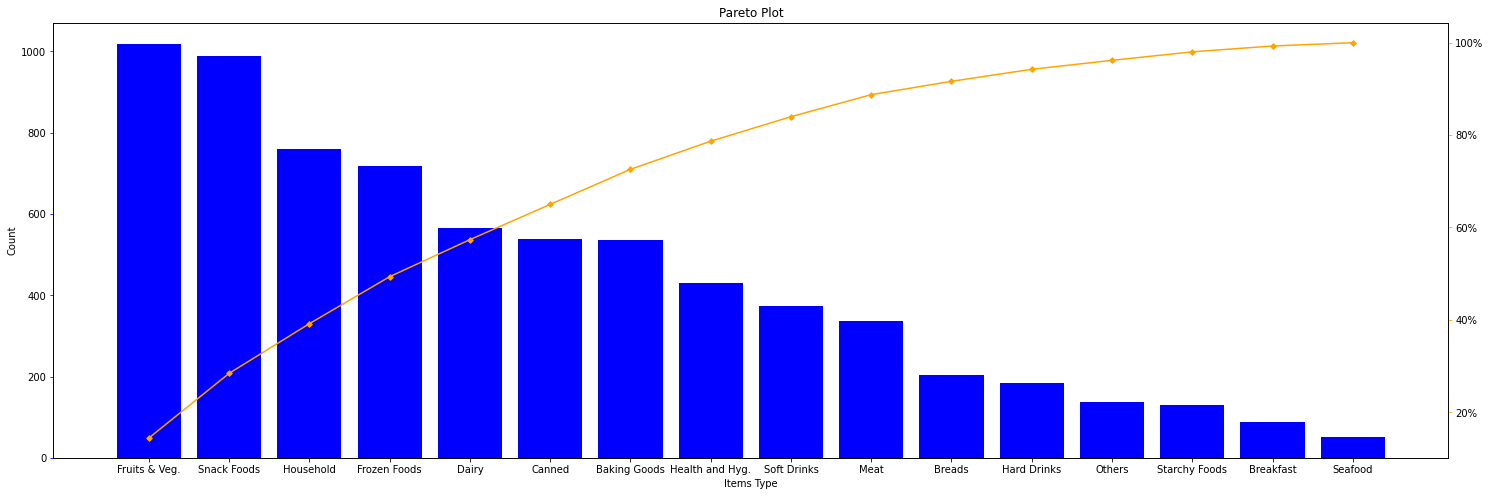

In [ ]:
# Defining aesthetics for our plot.
color1 = 'blue'
color2 = 'orange'
line_size = 4

# Creating a basic bar plot, using Pandas.
fig, ax = plt.subplots(figsize=(25,8))
ax.bar(pareto_df.index, pareto_df['Count'], color=color1)
ax.set(xlabel='Items Type', ylabel='Count', title='Pareto Plot')

# Adding the line that will indicate how the percentage is cumulative.
# Remember that in Pareto, we are looking for the 80% cumulative in order to have the 20% of the items that generate ~80% of the sales.
ax2 = ax.twinx()
ax2.plot(pareto_df.index, pareto_df['%Cum'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Specify axis colors.
ax.tick_params(axis='y', color=color1)
ax2.tick_params(axis='y', color=color2)

# Now, let's display our amazing plot.
plt.show()
     

Note:

- So, we know if we want to analyze the relationship between the price (Item_MRP) and products (Item_Type), it would have more impact if we exclude: Meat, Breads, Hard Drinks, Others, Starchy Foods, Breackfast, and Seafood

## 6.2.- Exploring data of Variables Type B

In [ ]:
# Checking the categories inside 'Outlet_Size' column.
df['Outlet_Size'].value_counts().sort_values(ascending=False)

Medium    4268
Small     1860
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Checking the categories inside 'Outlet_Location_Type' column.
df['Outlet_Location_Type'].value_counts().sort_values(ascending=False)

Tier 2    2785
Tier 3    2415
Tier 1    1860
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# Checking the categories inside 'Outlet_Type' column.
df['Outlet_Type'].value_counts().sort_values(ascending=False)

Supermarket Type1    5577
Supermarket Type2     928
Grocery Store         555
Name: Outlet_Type, dtype: int64

Notes:

- The 'Medium' size of the stores, has the majority of the entries.
- But, remember that we had 2,410 missing values on 'Outlet_Size' and we decided to fill in with 'Medium'.
- So before the filling, the values were (in descending order): Small: 1,860, Medium: 1,858, High: 932.
- Now 'Medium' is in the first place, and we agreed to work with that because we want to help the stores with medium size to improve their sales.
- The stores located at 'Tier 2' reported more entries.
- The store's type 'Supermarket Type1' have more entries than the other two types sum together (1,483 entries).

In [ ]:
# Let's filter our data to see where 'Supermarket Type1' is located.
supermarket_type1_filter = df['Outlet_Type'] == "Supermarket Type1"
a_df = df.loc[supermarket_type1_filter, :]
a_df['Outlet_Location_Type'].value_counts()

Tier 2    2785
Tier 1    1860
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

Note:

- 'Supermarket Type1' is located in 'Tier 2' and 'Tier 1' if we compare the results between df and a_df (code line [36] and [38]).

In [ ]:
# Let's create another filter to confirm our statement.
tier_filter = df['Outlet_Location_Type'] == "Tier 3"
df.loc[tier_filter, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,FDR26,20.700,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834


In [ ]:

# Now, let's combine our filters, and check the results.
combine1_filter = df.loc[tier_filter & ~supermarket_type1_filter, :]
combine1_filter['Outlet_Type'].value_counts()

Supermarket Type2    928
Grocery Store        555
Name: Outlet_Type, dtype: int64

In [ ]:
combine1_filter['Outlet_Type'].value_counts().sum()

1483

In [ ]:
df['Outlet_Type'].value_counts().sum() - a_df['Outlet_Location_Type'].value_counts().sum()
     

1483

In [ ]:
# Let's have a look of our dataframe.
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266


# Section 7: Visual Exploration

## 7.1.- HISTOGRAMS

In order to view the different distributions in our dataframe, let's plot some histograms.

### 7.1.1.- Exploring data of Variables Type A

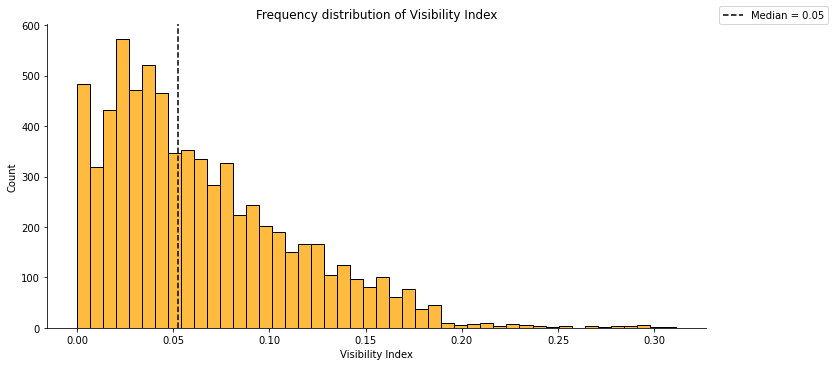

In [ ]:
# Let's plot a histogram for 'Item_Visibility'.
vis = sns.displot(data=df, x='Item_Visibility', aspect=2, bins='auto', color='orange')
vis.ax.set(title='Frequency distribution of Visibility Index')
median = df['Item_Visibility'].median()
vis.ax.axvline(median, color='black', linestyle='--', label=f"Median = {median:,.2f}")
vis.ax.legend(loc=(1.02,1))
vis.set_xlabels('Visibility Index');

Notes:

- From our histogram, we can see that we should improve the visibility of the products in order to increase sales.
- The graph confirms what we reported in the notes, after code line [29].

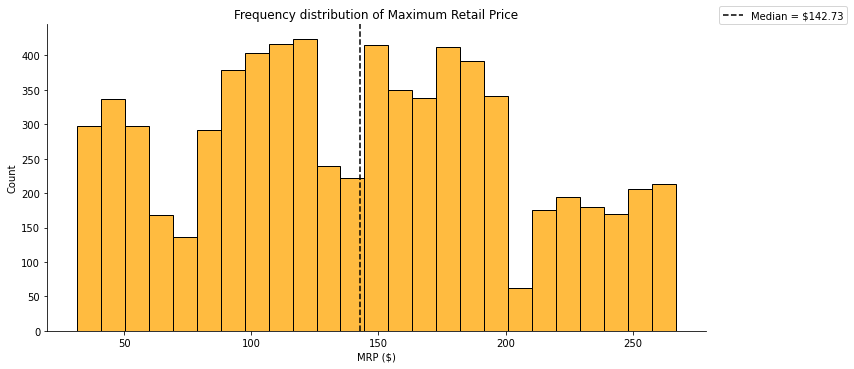

In [ ]:
# Let's plot a histogram for 'Item_MRP'.
mrp = sns.displot(data=df, x='Item_MRP', aspect=2, bins='auto', color='orange')
mrp.ax.set(title='Frequency distribution of Maximum Retail Price')
median = df['Item_MRP'].median()
mrp.ax.axvline(median, color='black', linestyle='--', label=f"Median = ${median:,.2f}")
mrp.set_xlabels('MRP ($)')
mrp.ax.legend(loc=(1.02,1));

Note:

- Later we could deeper into the analysis of MRP because maybe the price per item is mature enough to suggest a change.

### 7.1.2.- Exploring data of Variables Type B

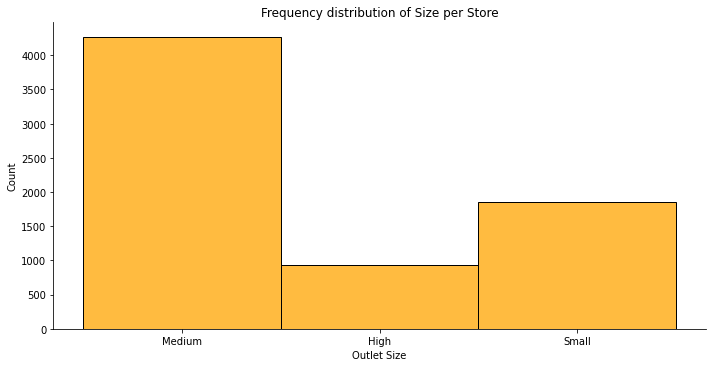

In [ ]:
# Let's plot a histogram for 'Outlet_Size'.
size = sns.displot(data=df, x='Outlet_Size', aspect=2, bins='auto', color='orange')
size.ax.set(title='Frequency distribution of Size per Store')
size.ax.set_xlabel('Outlet Size');

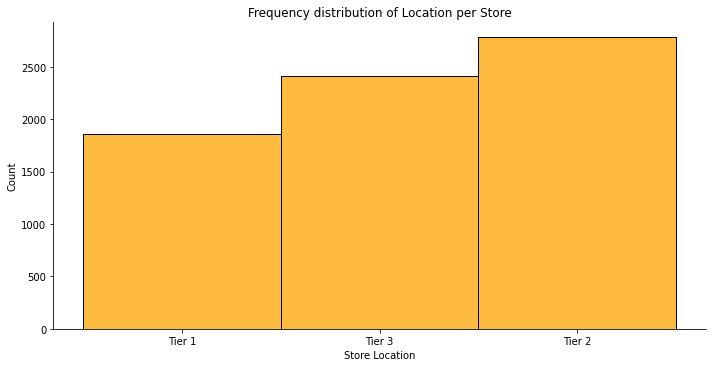

In [ ]:
# Let's plot a histogram for 'Outlet_Location_Type'.
location = sns.displot(data=df, x='Outlet_Location_Type', aspect=2, bins='auto', color='orange')
location.ax.set(title='Frequency distribution of Location per Store')
location.ax.set_xlabel('Store Location');


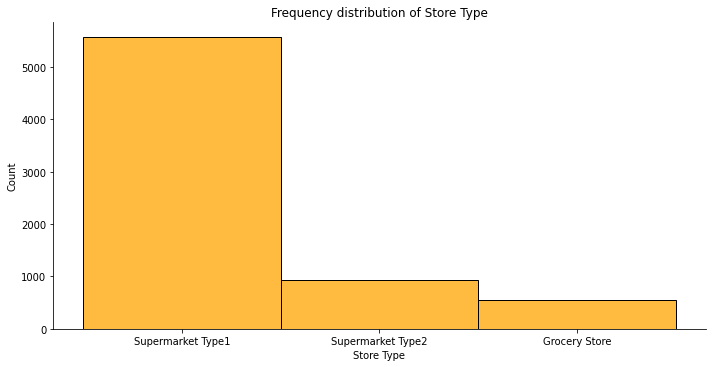

In [ ]:
# Lets' plot a histogram for 'Outlet_Type'.
storetype = sns.displot(data=df, x='Outlet_Type', aspect=2, bins='auto', color='orange')
storetype.ax.set(title='Frequency distribution of Store Type')
storetype.ax.set_xlabel('Store Type');

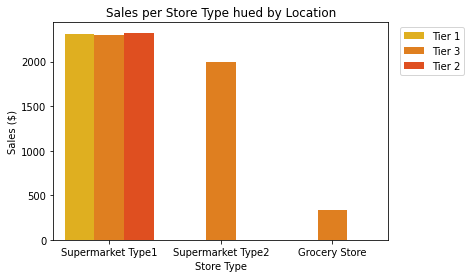

In [ ]:
# Let's graph a barplot to visualize the sales per Store Type hued by Location.
salesbarplot = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', ci=None, palette='autumn_r')
salesbarplot.set(title='Sales per Store Type hued by Location')
salesbarplot.legend(bbox_to_anchor=[1.02,1])
salesbarplot.set_xlabel('Store Type')
salesbarplot.set_ylabel('Sales ($)');

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 7.2.- BOXPLOT

### 7.2.1.- Exploring data of Variables Type A

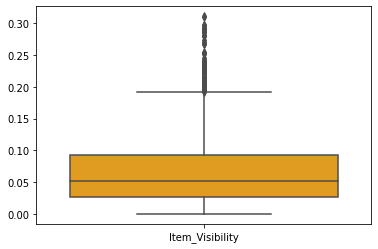

In [ ]:
# Let's plot a boxplot for 'Item_Visibility'.
sns.boxplot(data=df.loc[:, ['Item_Visibility']], color='orange')
sns.set(rc={'figure.figsize':(8,8)})

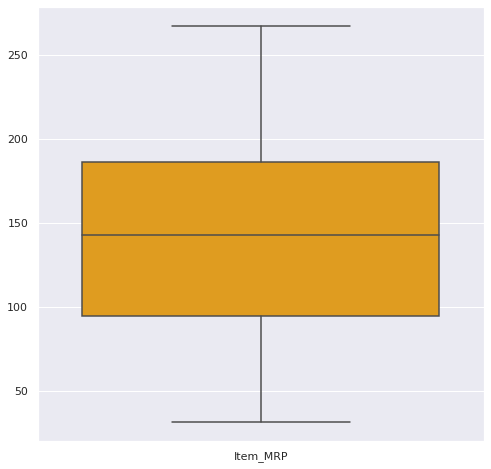

In [ ]:
# Let's plot a boxplot for 'Item_MRP'.
sns.boxplot(data=df.loc[:, ['Item_MRP']], color='orange')
sns.set(rc={'figure.figsize':(8,8)})

## 7.3.- HEATMAP

- In order to see the correlation between features, let's plot a heatmap.

In [ ]:
# Calculating the correlation.
corr = df.corr()
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.006061,-0.016935,-0.085334
Item_MRP,0.027141,-0.006061,1.000000,-0.001657,0.620961
Outlet_Establishment_Year,-0.011588,-0.016935,-0.001657,1.000000,0.012212
Item_Outlet_Sales,0.014123,-0.085334,0.620961,0.012212,1.000000


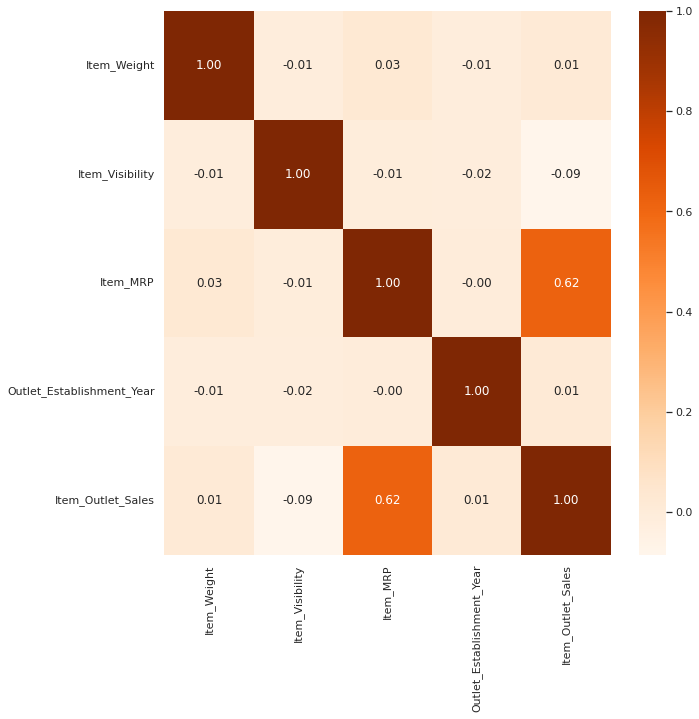

In [ ]:
# Let's plot our heatmap.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Oranges', annot=True, fmt='.2f');

Notes:

- As we can see, we found a moderate correlation between the sales and the list price.
- According to our heatmap, we have a weak correlation between the visibility and the sales.

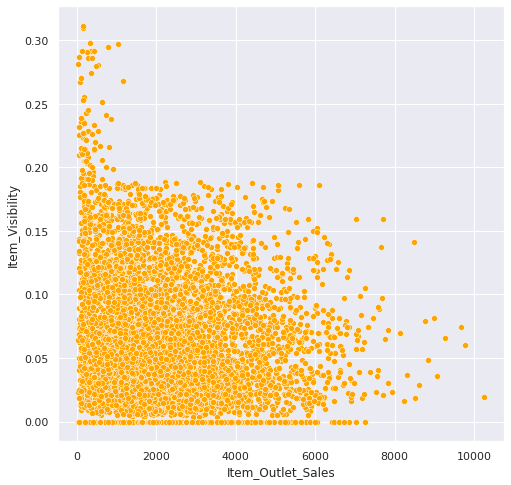

In [ ]:
# Let's see what could be found if we evaluate the correlation between the visibility and sales, using a Scatter Plot.
sns.scatterplot(data=df, x='Item_Outlet_Sales', y='Item_Visibility', color='Orange');
     

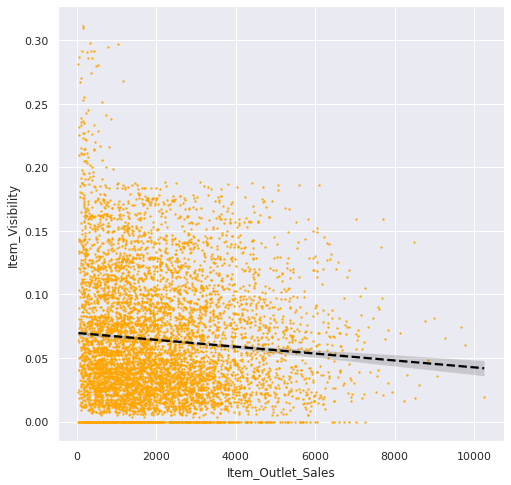

In [ ]:
sns.regplot(data=df, x='Item_Outlet_Sales', y='Item_Visibility', scatter_kws={'s':2}, line_kws={'color': 'black', 'ls': '--'}, color='Orange');
     

Note:

Both graphs confirmed the weak correlation.

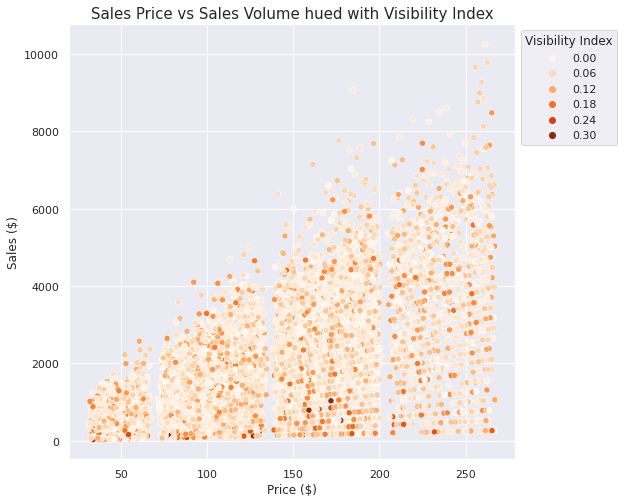

In [ ]:
# Let's see how the moderate correlation that we identified, is related to visibility.
crr = sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Visibility', palette='Oranges')
crr.set_title('Sales Price vs Sales Volume hued with Visibility Index', fontsize=15)
crr.legend(bbox_to_anchor=[1,1], title='Visibility Index')
crr.set_xlabel('Price ($)')
crr.set_ylabel('Sales ($)');

Notes:

It's kind of hard to see, but our last plot shows that in our higher price range (200 +) we have less darker points (high visibility percentage).
In the other hand, the higher visibility index is "located" in sales under $2,000.

## Section 8: Data Simulation

### 8.1 - Current Situation

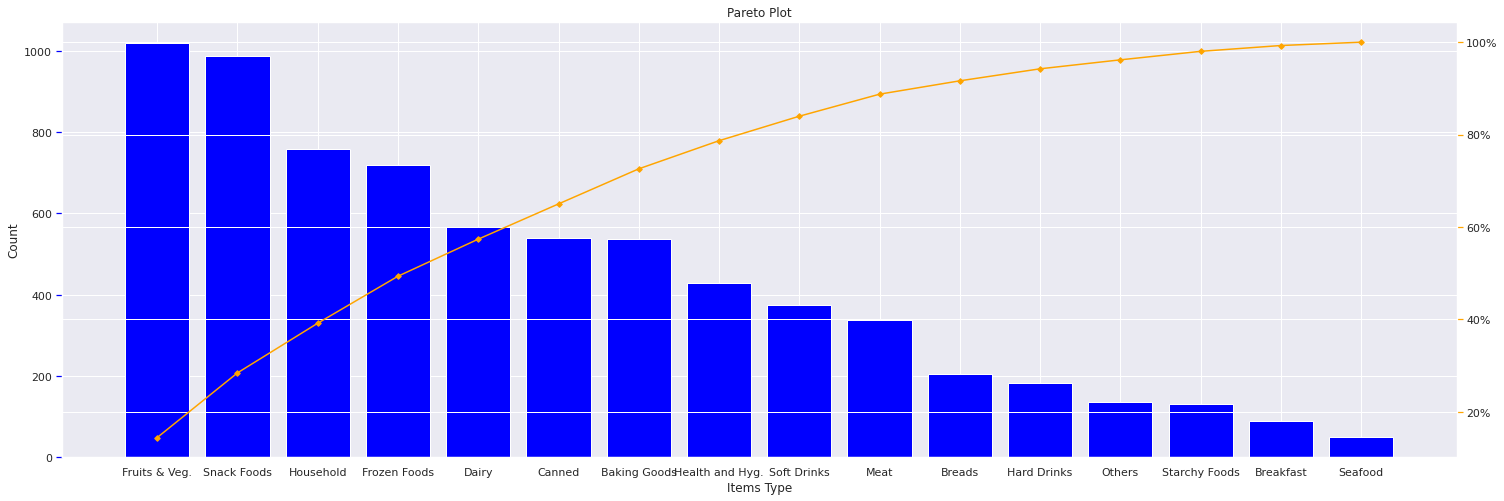

In [ ]:
# Defining aesthetics for our plot.
color1 = 'blue'
color2 = 'orange'
line_size = 4

# Creating a basic bar plot, using Pandas.
fig, ax = plt.subplots(figsize=(25,8))
ax.bar(pareto_df.index, pareto_df['Count'], color=color1)
ax.set(xlabel='Items Type', ylabel='Count', title='Pareto Plot')

# Adding the line that will indicate how the percentage is cumulative.
# Remember that in Pareto, we are looking for the 80% cumulative in order to have the 20% of the items that generate ~80% of the sales.
ax2 = ax.twinx()
ax2.plot(pareto_df.index, pareto_df['%Cum'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Specify axis colors.
ax.tick_params(axis='y', color=color1)
ax2.tick_params(axis='y', color=color2)

# Now, let's display our amazing plot.
plt.show()

Now let's keep working with the notes that we reported in code line [34].

In [ ]:
# Let's create a new dataframe with the results form our Pareto.
pareto_filter_df = df.loc[(df.Item_Type == 'Fruits and Vegetables') | (df.Item_Type == 'Snack Foods') 
                        | (df.Item_Type == 'Household')  | (df.Item_Type == 'Frozen Foods') | (df.Item_Type == 'Dairy') 
                        | (df.Item_Type == 'Canned') | (df.Item_Type == 'Baking Goods') | (df.Item_Type == 'Health and Hygiene') 
                        | (df.Item_Type == 'Soft Drinks'), :]
pareto_filter_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


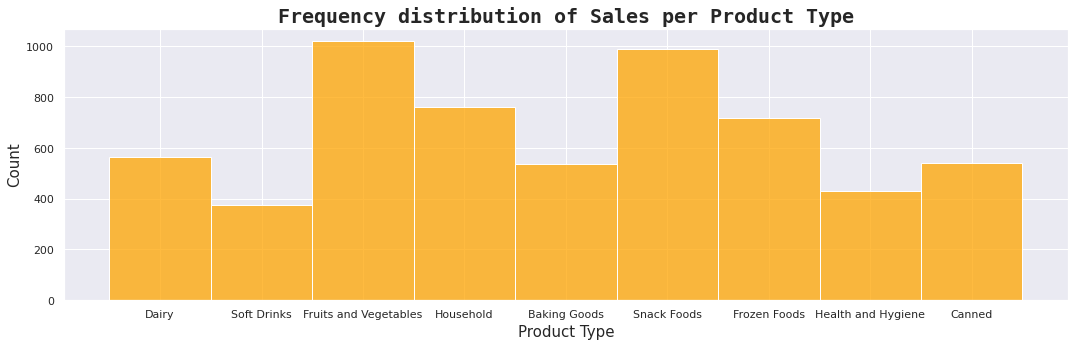

In [ ]:
# Let's plot a histogram for 'Item_Type' with our new dataframe (pareto_filter_df).
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(data=pareto_filter_df, x='Item_Type', ax=ax, bins='auto', color='orange')
ax.set_title('Frequency distribution of Sales per Product Type', 
             fontfamily='monospace',
             fontsize=20,
             fontweight='semibold');

## Formating Axis Label Font Sizes
ax.set_xlabel('Product Type', fontsize=15)
ax.set_ylabel(ax.yaxis.get_label().get_text(), fontsize=15);

In [ ]:
# Let's see how many sales are reported per each type of product.
sales1_df = pareto_filter_df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
sales1_df = sales1_df.sort_values(ascending=True)
round(sales1_df, 2)

Item_Type
Soft Drinks               735962.00
Health and Hygiene        835170.86
Baking Goods             1027219.54
Canned                   1155261.54
Dairy                    1244132.52
Frozen Foods             1494209.67
Household                1659037.11
Snack Foods              2194044.70
Fruits and Vegetables    2219977.61
Name: Item_Outlet_Sales, dtype: float64

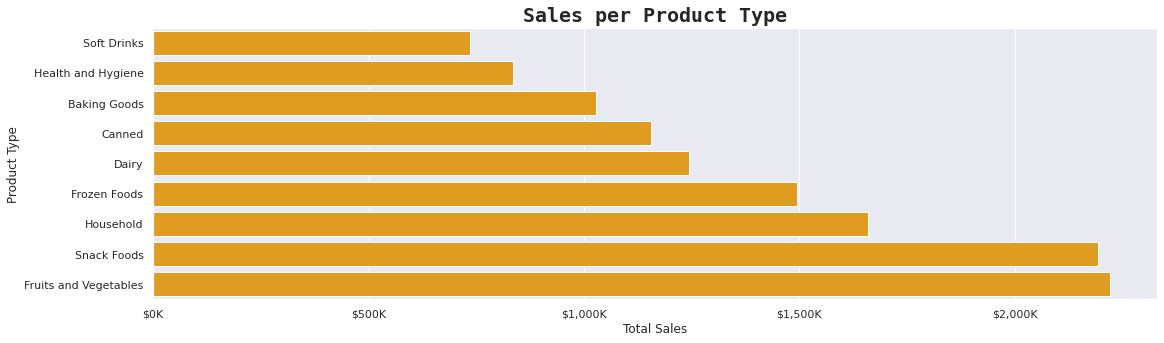

In [ ]:
# Let's graph a barplot with the Series above.
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
     return f"${x*1e-3:,.0f}K"

def plot_dist(data=pareto_filter_df, x='Item_Outlet_Sales', figsize=(18,5), format_pareto=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Graph barplot
    sns.barplot(data=pareto_filter_df, 
            x=sales1_df.values, y=sales1_df.index, ax=ax, color='orange', ci=None)
    ax.set_title('Sales per Product Type', 
             fontfamily='monospace',
             fontsize=20,
             fontweight='semibold')
    ax.set_xlabel('Total Sales')
    ax.set_ylabel('Product Type')


    ## if format_mrp is True use our FuncFormatter
    if format_pareto:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    return fig,ax

plot_dist(pareto_filter_df);
     

Notes:

In the graph above, we can see the income generated from the most popular products sold by Bit Mart.
The products show not only represent ~80% of sales, but also represent the focus point for our analysis.

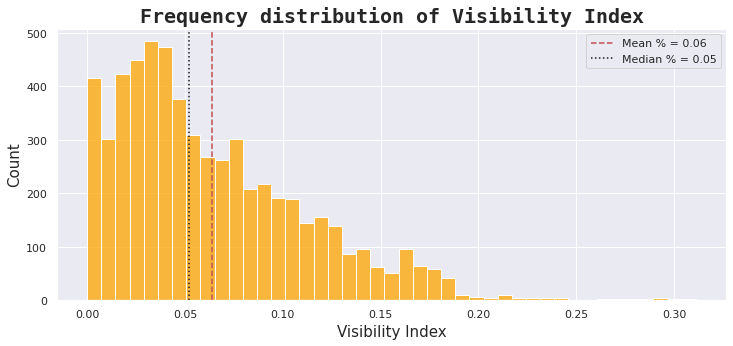

In [ ]:
# Let's plot a histogram for 'Item_Visibility' with our new dataframe (pareto_filter_df).
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data=pareto_filter_df,x='Item_Visibility', ax=ax, bins='auto', color='orange')
ax.set_title('Frequency distribution of Visibility Index', 
             fontfamily='monospace',
             fontsize=20,
             fontweight='semibold');

## Annotating mean and median
mean_price = pareto_filter_df['Item_Visibility'].mean()
ax.axvline(mean_price,color='r', ls='--', 
           label=f"Mean % = {mean_price:,.2f}",);
med_price = pareto_filter_df['Item_Visibility'].median()
ax.axvline(med_price,color='k', ls=':', 
           label=f"Median % = {med_price:,.2f}");

## Formating Axis Label Font Sizes
ax.set_xlabel('Visibility Index', fontsize=15)
ax.set_ylabel(ax.yaxis.get_label().get_text(), fontsize=15)

ax.legend();

Notes:

We do not detect a significant difference between the graph above and the one plotted on section 7.1.1 (code line [44]).
The midpoint (median) in our data is lower than the average (mean), so in order to simulate the next scenarios we are going to use the median, reducing the effect caused by the outliers.

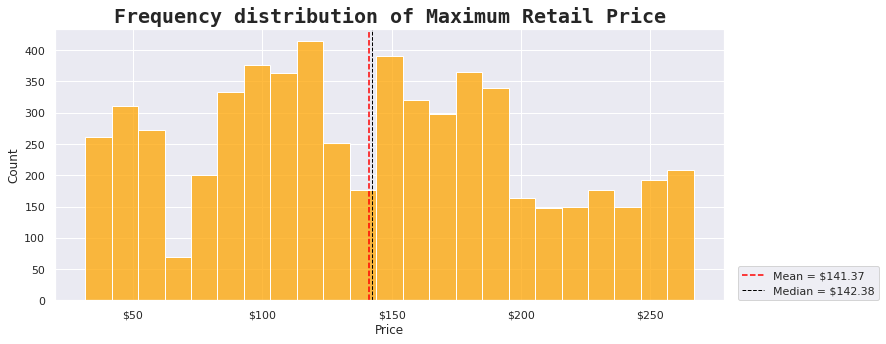

In [ ]:
# Let's plot a histogram for 'Item_MRP' with our new dataframe (pareto_filter_df).
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
    return f"${x*1:,.0f}"


def plot_dist(data=pareto_filter_df, x='Item_MRP', figsize=(12,5), format_mrp=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot histogram
    sns.histplot(data=pareto_filter_df, x=x, ax=ax, bins='auto', color='orange')
    ax.set_title('Frequency distribution of Maximum Retail Price',
                 fontfamily='monospace',
                 fontsize=20,
                 fontweight='semibold')
    ax.set_xlabel('Price');


    ## Annotating mean and median
    mean_price = pareto_filter_df[x].mean()
    ax.axvline(mean_price,color='red', ls='--', 
            label=f"Mean = ${mean_price:,.2f}");

    med_price = pareto_filter_df[x].median()
    ax.axvline(med_price,color='black', ls='--', lw=1,
            label=f"Median = ${med_price:,.2f}");
    ax.legend(loc=(1.02,0));


    ## if format_mrp is True use our FuncFormatter
    if format_mrp:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    return fig,ax

plot_dist(pareto_filter_df);

Notes:

The median reported on section 7.1.1 code line [45] ($142.73) is pretty near to the one calculated in our filtered dataframe (Pareto), indicating again, how stable is MRP variable.
The plot reflects a normal behavior in our data

## 8.2 - New Situation

- In this section we are going to simulate how the sales would be if:
1. The current stores increase lower visibility index (up to 0.01).
2. New stores were located in Tier 2.

### 8.2.1.- Visibility Index

- The new Visibility Index suggested will be 0.01, assuming less expensive improvement.

In [ ]:
# Let's create a new Pareto Dataframe.
new_pareto_df = pareto_filter_df
new_pareto_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5929.000000,5929.000000,5929.000000,5929.000000,5929.000000
mean,12.919588,0.063925,141.365524,2000.483555,2119.247015
std,4.651423,0.048495,62.643800,6.609054,1537.119220
min,4.555000,0.000000,31.490000,1987.000000,33.290000
25%,8.775000,0.026954,93.780400,1997.000000,922.798800
50%,12.800000,0.052061,142.381200,2002.000000,1779.017600
75%,17.000000,0.093028,186.455600,2007.000000,2960.146800
max,21.350000,0.311090,266.888400,2009.000000,10256.649000


In [ ]:
# Let's create a 'for loop' in order to assign 0.01, in a new column,
# to those rows which 'Item_Visibility' is under 0.01.

for value in new_pareto_df:
  if (new_pareto_df.iloc[:,3] <= 0.01).any() == True: # 3 is the column 'Item_Visibility'.
    new_pareto_df['New_Visibility_Index'] = 0.01
    break
  else:
    new_pareto_df['New_Visibility_Index'] = new_pareto_df['Item_Visibility']

# Using any() and all() code was took from:
## https://www.learndatasci.com/solutions/python-valueerror-truth-value

<ipython-input-70-f6db643ccc7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pareto_df['New_Visibility_Index'] = 0.01


In [ ]:
# Let's see the temporary result.
new_pareto_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Visibility_Index
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.01
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.01
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0.01
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.01
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.01
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,0.01
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,0.01
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,0.01
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,0.01
11,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530,0.01


In [ ]:
# Let's add a column with the 12% sales increase.
new_sales_df = df
new_sales_df['12%_Sales'] = new_sales_df['Item_Outlet_Sales']+(new_sales_df['Item_Outlet_Sales']*0.12)
new_sales_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,12%_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,4183.354560
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,496.633536
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2348.942400
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,820.265600
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1114.069824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,3111.789408
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,615.199200
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,1336.287232
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,2067.069312


### 8.2.2.- New Stores located in Tier 2

- We were informed two stores could open in 2023.
- This simulation will be based in current sells, not the projection made in code line [78]

In [ ]:
# Let's count how many stores Big Mart have.
new_pareto_df[['Outlet_Identifier', 'Outlet_Location_Type']].value_counts()

Outlet_Identifier  Outlet_Location_Type
OUT013             Tier 3                  790
OUT017             Tier 2                  787
OUT046             Tier 1                  787
OUT035             Tier 2                  783
OUT018             Tier 3                  777
OUT045             Tier 2                  775
OUT049             Tier 1                  774
OUT010             Tier 3                  456
dtype: int64

In [ ]:
# Let's calculate their average.
aver1 = (790 + 787 + 787 + 783 + 777 + 775 + 774 + 456) / 8
print('On average each store sells',round(aver1,2), 'items per year.'
      '\n781 is average in Tier 2. Remembering that both new stores will be in that location'
      '\n741 is the value to consider to simulate our scenario.')

On average each store sells 741.12 items per year.
781 is average in Tier 2. Remembering that both new stores will be in that location
741 is the value to consider to simulate our scenario.


In [ ]:
# Let's display how much each store sale.
sales2_df = new_pareto_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
sales2_df = sales2_df.sort_values(ascending=True)
round(sales2_df, 2)

Outlet_Identifier
OUT010     152015.46
OUT018    1538270.98
OUT045    1706938.76
OUT046    1783122.92
OUT049    1823567.61
OUT013    1826589.01
OUT017    1850449.95
OUT035    1884060.87
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Let's calculate their average.
aver2 = (1520215.46 + 1538270.98 + 1706938.76 + 1783122.92 + 1823567.61 + 1826589.01 + 1850449.95 + 1884060.87) / 8
print('On average each store sells $',round(aver2,2),'per year.'
      '\n$1,850,451.95 is the average in Tier 2, but in order to be conservative,'
      '\n$1,741,651.94 is the value to consider to simulate our scenario.')
     

On average each store sells $ 1741651.94 per year.
$1,850,451.95 is the average in Tier 2, but in order to be conservative,
$1,741,651.94 is the value to consider to simulate our scenario.


In [ ]:
# Let'e keep columns 'Outlet_Identifier', 'Outlet_Establishment_Year',
# 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', and 'Item_Outlet_Sales'.
new_pareto2_df = new_pareto_df.drop(columns = ['Item_Identifier', 'Item_Weight',
                                               'Item_Fat_Content', 'Item_Visibility',
                                               'Item_Type',	'Item_MRP', 'New_Visibility_Index'])
new_pareto2_df.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [ ]:
# Let's add new stores, keeping in mind Supermarket Type1 is located in Tier 2.
new_store1 = {'Outlet_Identifier':'OUT050', 'Outlet_Establishment_Year':'2023',
              'Outlet_Size':'Medium', 'Outlet_Location_Type':'Tier 2',
              'Outlet_Type':'Supermarket Type1', 'Item_Outlet_Sales':1741651.94}

new_store2 = {'Outlet_Identifier':'OUT051', 'Outlet_Establishment_Year':'2023',
              'Outlet_Size':'Medium', 'Outlet_Location_Type':'Tier 2',
              'Outlet_Type':'Supermarket Type1', 'Item_Outlet_Sales':1741651.94}
     

In [ ]:
# Let's append new rows to the 2023 projection.
new_pareto2_df = new_pareto2_df.append(new_store1, ignore_index=True)
new_pareto2_df = new_pareto2_df.append(new_store2, ignore_index=True)

In [ ]:
# Let's confirm the new stores added.
new_pareto2_df[['Outlet_Identifier', 'Outlet_Location_Type']].value_counts()

Outlet_Identifier  Outlet_Location_Type
OUT013             Tier 3                  790
OUT017             Tier 2                  787
OUT046             Tier 1                  787
OUT035             Tier 2                  783
OUT018             Tier 3                  777
OUT045             Tier 2                  775
OUT049             Tier 1                  774
OUT010             Tier 3                  456
OUT050             Tier 2                    1
OUT051             Tier 2                    1
dtype: int64

In [ ]:
sales3_df = new_pareto2_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
sales3_df = sales3_df
round(sales3_df, 2)

Outlet_Identifier
OUT010     152015.46
OUT013    1826589.01
OUT017    1850449.95
OUT018    1538270.98
OUT035    1884060.87
OUT045    1706938.76
OUT046    1783122.92
OUT049    1823567.61
OUT050    1741651.94
OUT051    1741651.94
Name: Item_Outlet_Sales, dtype: float64

## Section 9: Conclusions

In [ ]:
# In general we have 2 variables to evaluate, linked to the improvement.
viz_sales_20_no = df['Item_Outlet_Sales'].sum()
viz_sales_20_yes = new_sales_df['12%_Sales'].sum()

In [ ]:
# About the sales linked to opening two stores.
sales4_df = new_pareto_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
sales4_df = sales4_df
sales_new_store_no = sales4_df.sum()

sales_new_store_yes = sales3_df.sum()

In [ ]:
# Getting the values per variable.
print(viz_sales_20_no)
print(viz_sales_20_yes)
print(sales_new_store_no)
print(sales_new_store_yes)

14957505.2654
16752405.897247998
12565015.5506
16048319.430599999


In [ ]:

# Let's create a DataFrame for our plot.
new_dataframe = [['Sales no 20%', 14957505.2654],
                 ['Sales with 20%', 16752405.897247998],
                 ['Sales no Store', 12565015.5506],
                 ['Sales with Store', 16048319.430599999]]
viz_df = pd.DataFrame(new_dataframe, columns=['Variable', 'Value'])
viz_df

,Variable,Value
0,Sales no 20%,1.495751e+07
1,Sales with 20%,1.675241e+07
2,Sales no Store,1.256502e+07
3,Sales with Store,1.604832e+07


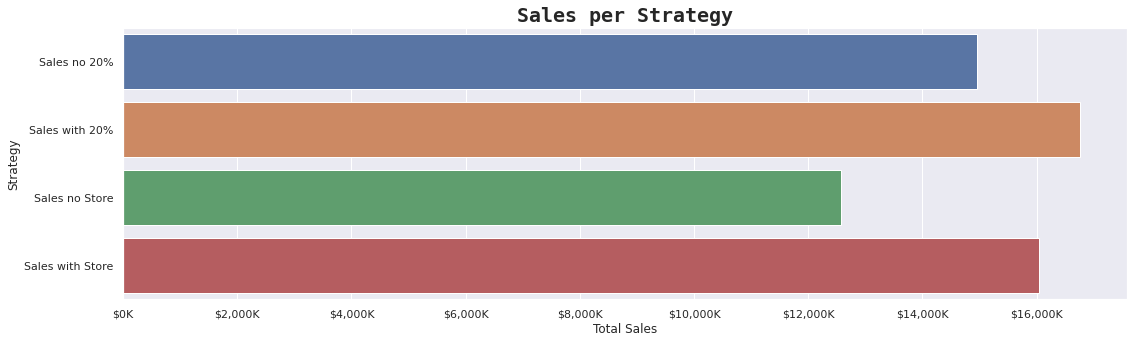

In [ ]:
# Let's create our plot.

from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
     return f"${x*1e-3:,.0f}K"

def plot_dist(data=viz_df, x='Value', figsize=(18,5), format_viz=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Graph barplot
    sns.barplot(data=viz_df, 
            x='Value', y='Variable', ax=ax, ci=None)
    ax.set_title('Sales per Strategy', 
             fontfamily='monospace',
             fontsize=20,
             fontweight='semibold')
    ax.set_xlabel('Total Sales')
    ax.set_ylabel('Strategy')


    ## if format_viz is True use our FuncFormatter
    if format_viz:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    return fig,ax

plot_dist(viz_df);

Notes:

- As we just demonstrated, Big Mart will have more income if decide to improve 20% the Visibility Index.
- The worst scenario is if they decide to not implement any strategy.
- We must remember that column Green and Red are variables altered by a Pareto analysis.
- We recommend to include the costs of each strategy in order to make a better decision.